### **AAI-510 Team Project**: Retail Sales Forecasting with Rossmann Store Sales Dataset
### **Team**: [Group 6]
### **GitHub Link**: https://github.com/jas-usd/Rossmann-Sales-Forecast.git

# **Problem statement and justification for the proposed approach**

## 1. Problem Statement

Rossmann, a major European drugstore chain with over 3,000 locations, faces significant challenges in accurately forecasting daily sales across its network of 1,115 stores in Germany. These challenges arise from the various factors influencing sales, such as:

*   **Promotions:** The effectiveness of promotional campaigns can vary significantly based on product type, timing, and regional differences.
*   **Holidays:** School and state holidays create predictable but variable spikes and dips in sales, depending on location and holiday type.
*   **Competition:** The proximity and strength of competitor stores impact sales, requiring consideration of competitive dynamics.
*   **Seasonality:** Sales exhibit seasonal patterns (e.g., increased demand for cold remedies in winter, sunscreen in summer), which need to be accurately captured.
*   **Store-Specific Characteristics:** Each store has unique characteristics (e.g., store type, assortment, customer demographics) that affect its sales patterns.

The current forecasting process at Rossmann relies on individual store manager expertise. This leads to inconsistencies in forecasting accuracy across stores, resulting in:

*   **Inventory Inefficiencies:** Overstocking of certain products, leading to waste and tied-up capital, and understocking of others, resulting in lost sales and customer dissatisfaction.
*   **Suboptimal Staff Scheduling:** Inaccurate forecasts lead to understaffing during peak periods, causing long queues and poor customer service, and overstaffing during slow periods, increasing labor costs.
*   **Ineffective Marketing Strategies:** Difficulty in planning and executing targeted marketing campaigns due to uncertainty about future sales trends.

**Thus, the issue is a absence of a reliable, data-driven, and consistent sales forecasting system that takes into the consideration of the complex factors influencing sales at each Rossmann store, leading to inefficiencies in operations and lost revenue opportunities.**

## 2. Justification for the Proposed Approach

We're creating a machine learning model to forecast sales for every Rossmann store on a given day. Here's why this works:

* **Data & Methods**: The Rossmann dataset contains rich historical sales information with promotions, holidays, and store attributes. Machine learning models such as Gradient Boosting, Random Forest and SARIMAX can capture sophisticated relationships that standard methods cannot.
* **Time Series Benefits**: There are distinct seasonality and trends in sales data. SARIMAX is able to manage these time dependencies as well as include external influences such as promotions within its forecasts.
* **Business Benefits**: This solution provides enhanced forecast accuracy for enhanced inventory control, data-driven decision-making for store managers, and improved operational efficiency through automation.

Machine learning forecasting works - businesses employ it to drive sales and unlock actionable insights from their data.

# **Initial Data Understanding and EDA**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style for better visualization
plt.style.use('seaborn-v0_8') # Use seaborn style for cleaner plots

In [ ]:
!pip install google-colab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import os

folder_path = '/content/drive/My Drive/Project-ML/'

print("Files in directory:", os.listdir(folder_path))


Files in directory: ['train.csv', 'store.csv', 'test.csv', 'sample_submission.csv']


## Importing Data

In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/My Drive/Project-ML'
os.makedirs(folder_path, exist_ok=True)

train_data = os.path.join(folder_path, 'train.csv')
store_data = os.path.join(folder_path, 'store.csv')
test_data = os.path.join(folder_path, 'test.csv')
sample = os.path.join(folder_path, 'sample_submission.csv')


# Load the Rossmann Store Sales dataset
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)
df_store = pd.read_csv(store_data)
df_sample = pd.read_csv(sample)

# print the columns and few rows
print('TRAIN DATA \n')
print(df_train.head())
print(df_train.columns)

print('STORE DATA \n')
print(df_store.head())
print(df_store.columns)



/tmp/ipython-input-9-704805837.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_data)


TRAIN DATA 

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
STORE DATA 

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2  

## Data Overview

In [ ]:
# Display basic information about the dataset
print("=== Train Data Overview ===")
print(df_train.info())  # Data types, missing values, and memory usage
print("\n=== Store Data Overview ===")
print(df_store.info())

=== Train Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

=== Store Data Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   

## Checking Missing Values

In [ ]:
# Check for missing values
print("\n=== Missing Values in Train Data ===")
print(df_train.isnull().sum())
print("\n=== Missing Values in Store Data ===")
print(df_store.isnull().sum())


=== Missing Values in Train Data ===
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

=== Missing Values in Store Data ===
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


- The training dataset (`train.csv`) is clean and contains no missing values.
- In contrast, the store dataset (`store.csv`) has missing values concentrated in columns related to competition (`CompetitionDistance`, `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear`) and Promo2 (`Promo2SinceWeek`, `Promo2SinceYear`, `PromoInterval`).

## Statistical Description

In [ ]:
# Basic statistics for numerical columns
print("\n=== Train Data Description ===")
print(df_train.describe())


=== Train Data Description ===
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00

- **Data Size**: 1,017,209 rows, no missing values across 7 columns (Store, DayOfWeek, Sales, Customers, Open, Promo, SchoolHoliday).
- **Sales**: Mean=5,774, median=5,744, max=41,551, right-skewed, zero sales likely when Open=0 (17% of days).
- **Customers**: Mean=633, max=7,388, skewed, correlates with Sales.
- **Promo & Holidays**: Promo active ~ 38% of days, SchoolHoliday ~ 18%, both likely boost Sales.
- **DayOfWeek**: Uniform (1–7, mean~4), suggests weekly sales patterns (e.g., weekend peaks).

## Sales Trend Over Time (For Store: 1)

In [ ]:
# Initial visualization: Sales trend over time
# Convert 'Date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

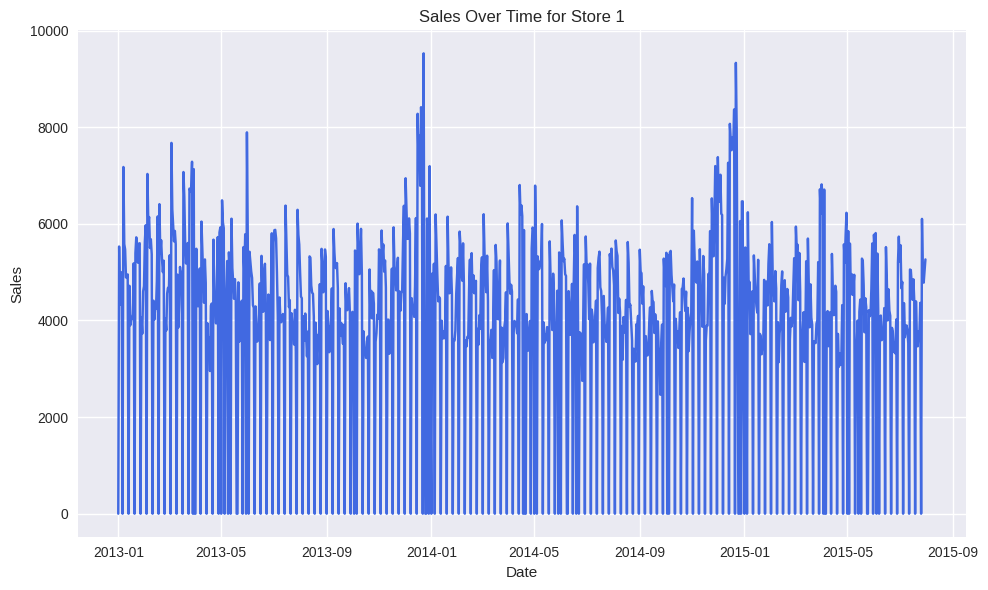

In [ ]:
# Filter for Store 1
store_id = 1
df_store1 = df_train[df_train['Store'] == store_id]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_store1['Date'], df_store1['Sales'], label=f'Store {store_id}', color='royalblue')
plt.title(f'Sales Over Time for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


With regular peaks and troughs that probably correspond to higher weekend sales and lower weekday or non-operating day sales, Store 1's sales data exhibits a distinct and reliable weekly pattern.  Every year, there are noticeable increases in sales in December, which is indicative of more holiday-season consumer activity.  Although the holiday peaks indicate somewhat greater sales year over year, total sales levels seem to have remained pretty consistent during the investigated period (2013–2015).  Days when the store was closed, like Sundays or public holidays, are probably indicated by frequent reductions to zero.  This trend demonstrates how store performance is impacted by both operational and seasonal factors.

## Sales Over Time (All Stores Combined)

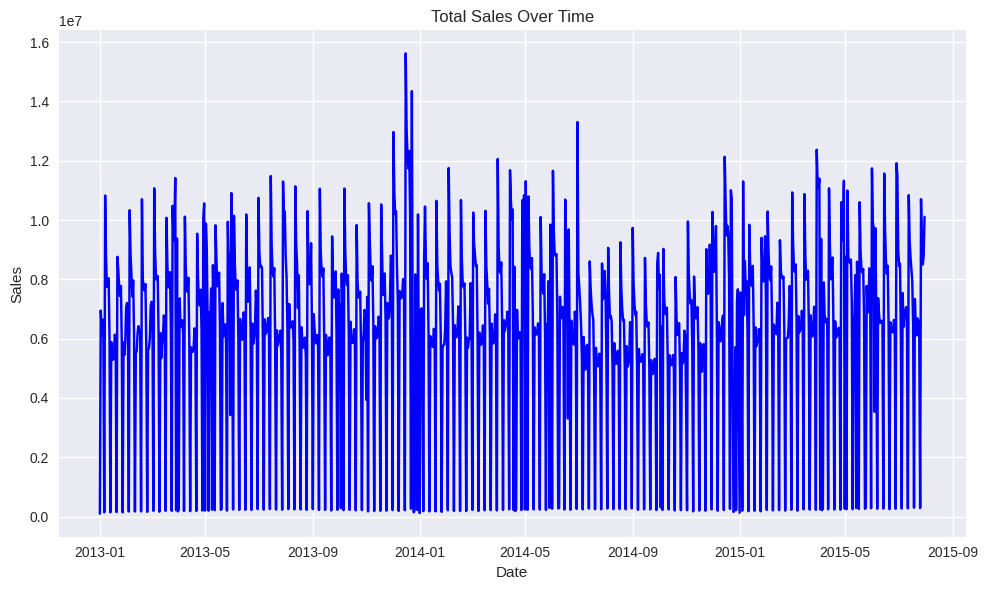

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by date and sum sales
daily_sales = df_train.groupby('Date')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_sales, x='Date', y='Sales', color='blue')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


**Weekly Seasonality:** There is a consistent repeating pattern, indicating weekly fluctuations in total sales.

**Holiday Peaks:** Strong spikes are seen around December each year, especially in late 2013 and 2014, suggesting holiday-driven sales boosts.

**Zero Sales:** Periodic drops to near-zero values indicate store-wide closures, likely on Sundays or public holidays.

**Stable with Slight Growth:** Overall sales appear stable with moderate increases in peak values over time.

**Cyclic Behavior:** The data reflects clear business cycles, with predictable peaks and troughs in sales performance.

## Sales Distribution

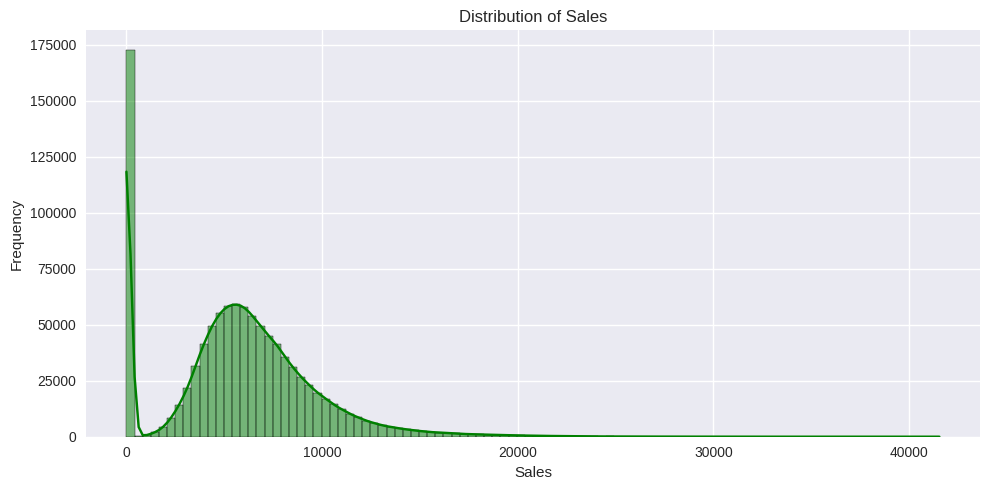

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['Sales'], bins=100, kde=True, color='green')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


The distribution of sales is **right-skewed**, with a large number of instances concentrated at lower sales values.
- A very high frequency of data points at or near **zero sales** suggests frequent store closures or non-operating days.
- The **mode** of the distribution appears between **5,000 and 10,000**, indicating that most non-zero sales days fall in this range.
- Higher sales values become increasingly rare, with very few days exceeding **20,000** in sales.
- The **long tail** toward the right reflects occasional high-performing days, possibly linked to promotions or holiday peaks.

## Sales by Day of Week


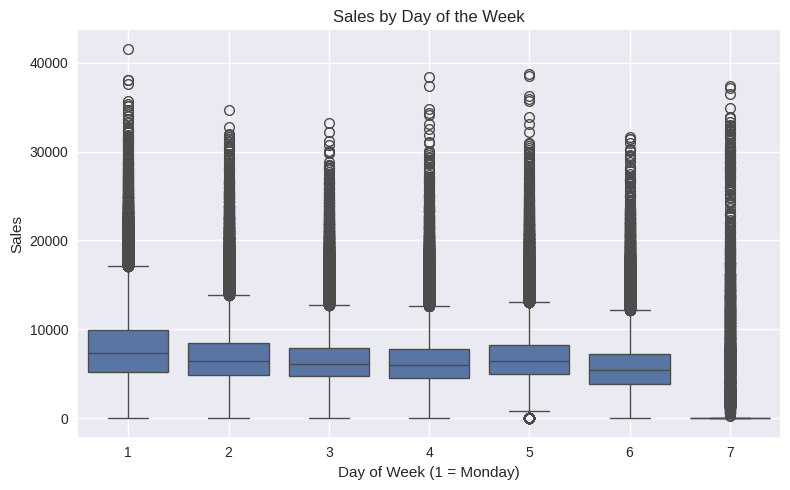

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DayOfWeek', y='Sales', data=df_train)
plt.title("Sales by Day of the Week")
plt.xlabel("Day of Week (1 = Monday)")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


Sales are distributed fairly consistently across weekdays (Monday to Saturday), with similar medians and interquartile ranges.
- **Monday (Day 1)** tends to have the highest median sales, suggesting strong early-week performance.
- **Sunday (Day 7)** shows a notably lower median and a wider range of low values, indicating it may often be a **non-operating or low-traffic day**.
- All days exhibit a substantial number of **outliers**, especially on high-sales days, likely corresponding to promotional events or holidays.
- The presence of sales values close to zero across all days reinforces the pattern of periodic closures or minimal sales days.

## Sales vs Promotion

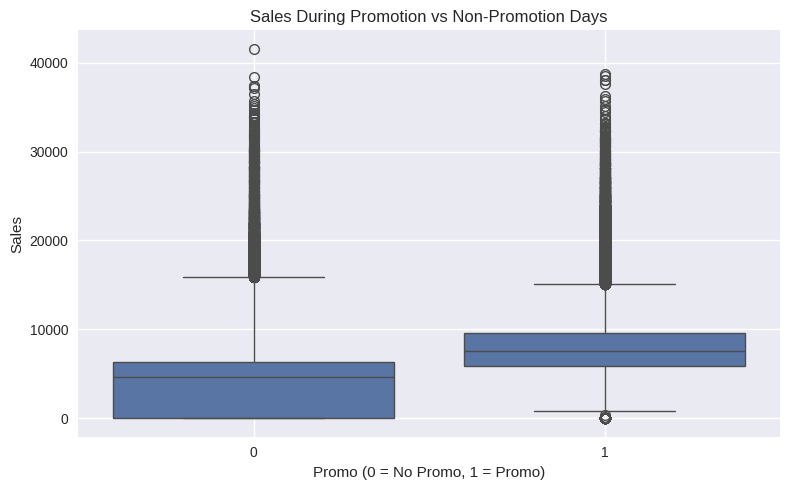

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Promo', y='Sales', data=df_train)
plt.title("Sales During Promotion vs Non-Promotion Days")
plt.xlabel("Promo (0 = No Promo, 1 = Promo)")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


Sales on **promotion days (Promo = 1)** are noticeably higher than on non-promotion days, both in terms of median and overall distribution.
- The **median sales** during promotions are significantly elevated, indicating that promotions are effective at boosting sales.
- The spread of sales is larger for promotional days, suggesting more variability—likely due to different levels of promotional intensity or store/customer responsiveness.
- Both categories show high-value outliers, but the promotional days tend to cluster more around higher sales figures.
- Non-promotion days have a higher concentration of low or zero sales, reinforcing the value of promotional strategies in driving store performance.

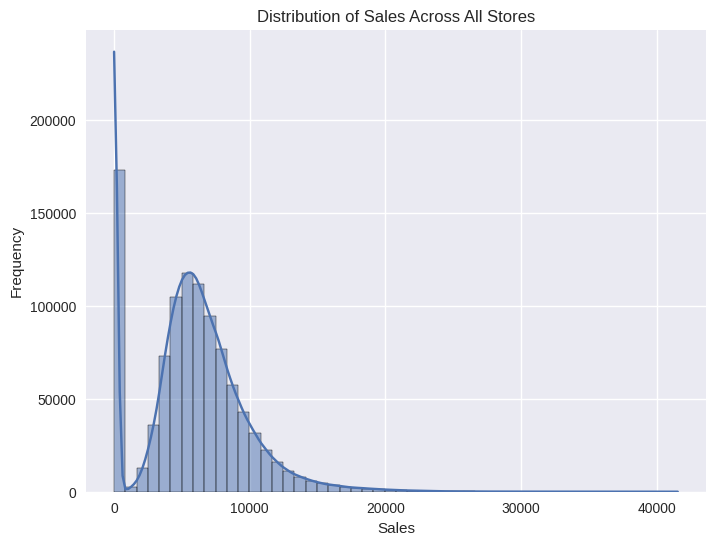

In [ ]:
# Initial visualization: Sales distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_train['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales Across All Stores')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The distribution is **heavily right-skewed**, indicating that most stores have low to moderate daily sales, with fewer instances of high sales.
- A **sharp spike near zero** suggests many days with no or very low sales, likely due to store closures or low customer turnout.
- The **peak frequency** of sales occurs between **5,000 and 10,000**, making this the most common sales range across all stores.
- The **long tail** stretching toward higher sales values reflects occasional high-performing days or stores.
- Overall, the pattern indicates that while high sales are possible, they are **not the norm**, emphasizing the importance of understanding store-level and temporal variability.

## Merge data for more insights

In [ ]:
# Merge train data with store info
df_merged = pd.merge(df_train, df_store, on='Store', how='left')


## Sales by Store Type

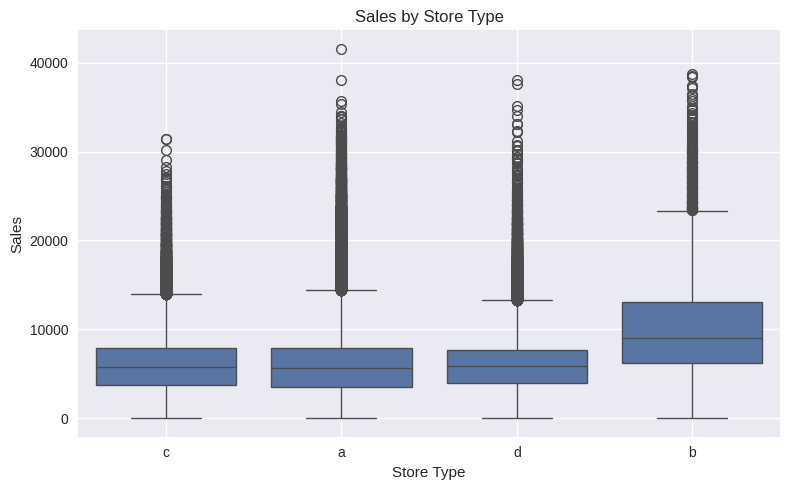

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_merged, x='StoreType', y='Sales')
plt.title("Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


- **Store Type 'b'** shows the **highest median and overall sales**, with a wider interquartile range and more extreme high-value outliers, indicating generally stronger and more varied performance.
- **Store Types 'a', 'c', and 'd'** have similar median sales levels, but **'a'** has a slightly higher median compared to 'c' and 'd'.
- All store types show a **large number of outliers**, suggesting occasional high-performance days across the board.
- **Store Type 'c'** appears to have the **lowest upper range** in sales, implying more consistent but lower revenue performance.
- The variability (spread) of sales is **highest in Store Type 'b'**, pointing to potentially more diverse customer bases or promotional strategies.


## Sales by Assortment Type

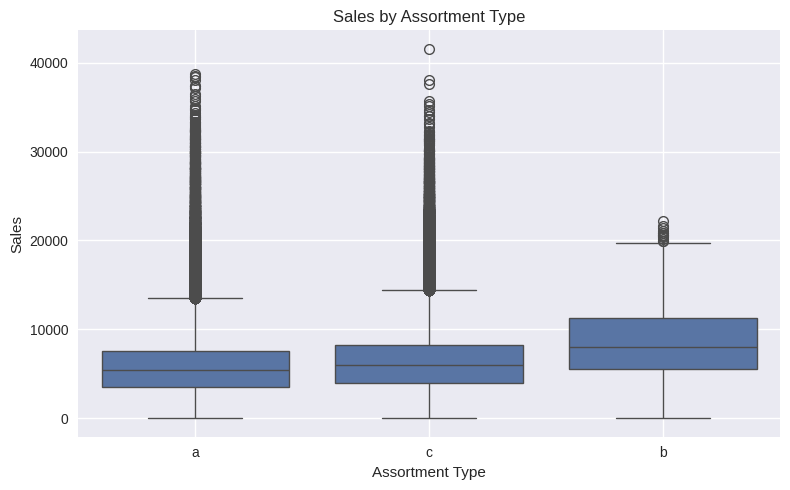

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_merged, x='Assortment', y='Sales')
plt.title("Sales by Assortment Type")
plt.xlabel("Assortment Type")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



- **Assortment Type 'b'** has the **highest median sales** and overall spread, indicating stronger performance compared to types 'a' and 'c'.
- **Assortment Types 'a' and 'c'** show similar median sales, though **type 'c'** exhibits a slightly wider range, suggesting more variability in performance.
- Outliers are present across all assortment types, especially for **types 'a' and 'c'**, showing some days of unusually high sales.
- **Assortment 'b'**, despite fewer extreme outliers, maintains **consistently higher sales**, possibly reflecting a more premium or broader product mix.
- The results suggest that assortment strategy significantly influences sales, with type **'b'** being the most effective among the three.

## Sales vs Competition Distance

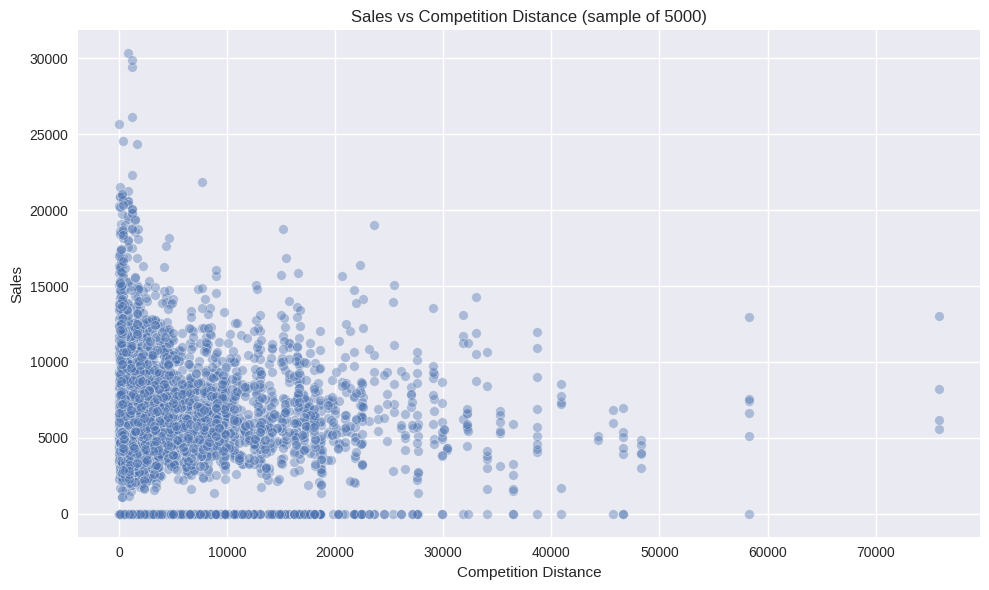

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged.sample(5000), x='CompetitionDistance', y='Sales', alpha=0.4)
plt.title("Sales vs Competition Distance (sample of 5000)")
plt.xlabel("Competition Distance")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



- **Inverse relationship** observed: As **competition distance increases**, **sales generally decrease**.
- Highest concentration of **high sales** appears when the **competition distance is below 5000 meters**.
- Stores with **close competitors (low distance)** still manage to generate high sales, suggesting strong brand loyalty or location advantages.
- There is significant **variability in sales** when competition distance is small, indicating other factors (e.g. promotions, store type) may play a key role.
- **Longer distances** (>20,000 meters) are associated with lower and more stable sales, though fewer data points are available in this range.
- A **large cluster of zero sales** exists across all distances, which might be due to closed stores or missing data on certain days.

## Sales Trend by StoreType Over Time

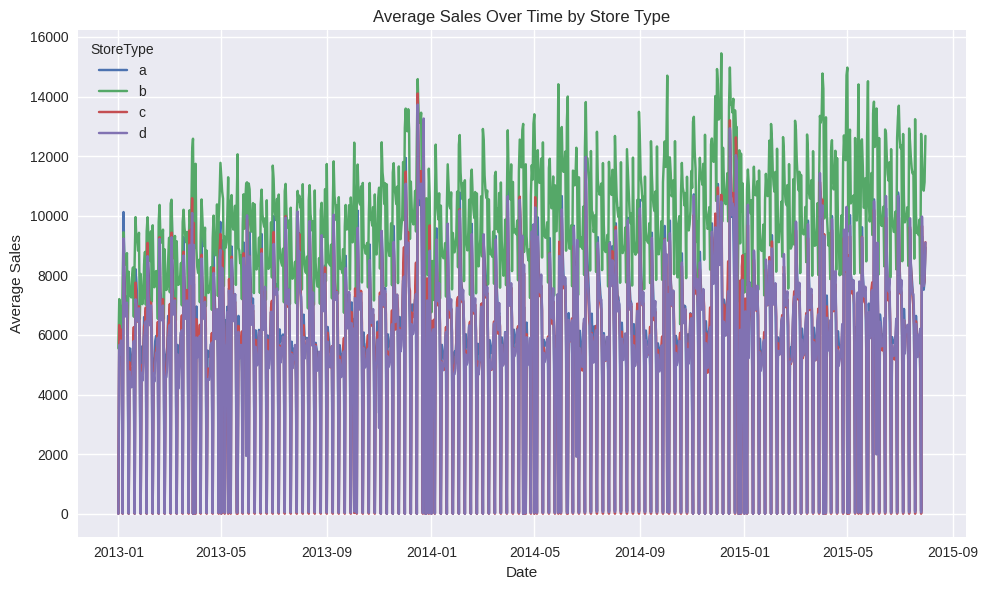

In [ ]:
# Group by Date and StoreType
df_time_storetype = df_merged.groupby(['Date', 'StoreType'])['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_time_storetype, x='Date', y='Sales', hue='StoreType')
plt.title("Average Sales Over Time by Store Type")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



- **Store Type 'b'** consistently shows the **highest average sales**, outperforming other types throughout the time period (2013–2015).
- **Store Types 'a', 'c', and 'd'** exhibit similar average sales trends, with type **'a'** generally higher than **'c'** and **'d'**.
- All store types show a clear **weekly sales cycle**, with periodic peaks and troughs – likely reflecting weekday vs weekend shopping behavior.
- There are noticeable **seasonal spikes**, particularly around the **end of each year (e.g., December holidays)**, where all store types show increased average sales.
- A **gradual upward trend** is visible over time, indicating potential **growth in sales** across all store types.
- **No extreme divergence** between types, suggesting a consistent retail environment with Type 'b' having structural advantages (e.g., size, location, assortment).


## **Data Summary & Initial Observations**
We began by loading and inspecting the Rossmann Sales dataset, which includes the following components:

**train.csv:** Contains daily sales data for ~1M observations across ~1,100 stores.

**store.csv:** Contains meta information for each store (e.g., type, assortment, competition).

**test.csv and sample_submission.csv:** Used for predictions and evaluation.

## **Dataset Size**

**Train dataset:** 1,017,209 rows × 9 columns

**Store dataset:** 1,115 rows × 10 columns

## **Key Features**

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2**- Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Initial Visual Insights**

*   Sales vary significantly by store type and assortment.
*   Promotions and holidays have observable impact on sales trends.
*   There’s a negative correlation between competition distance and sales for some stores (closer competitors may reduce sales).

*   Time series plots reveal seasonality and downward trends in certain store categories.

# **Data preparation & Feature engineering**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


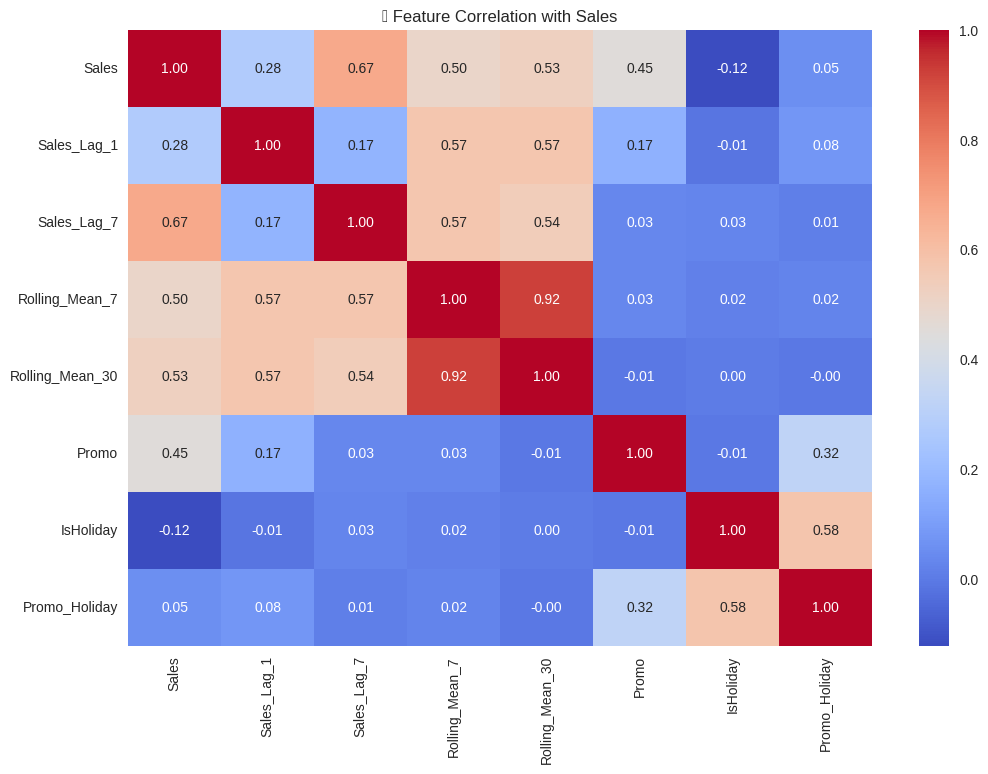

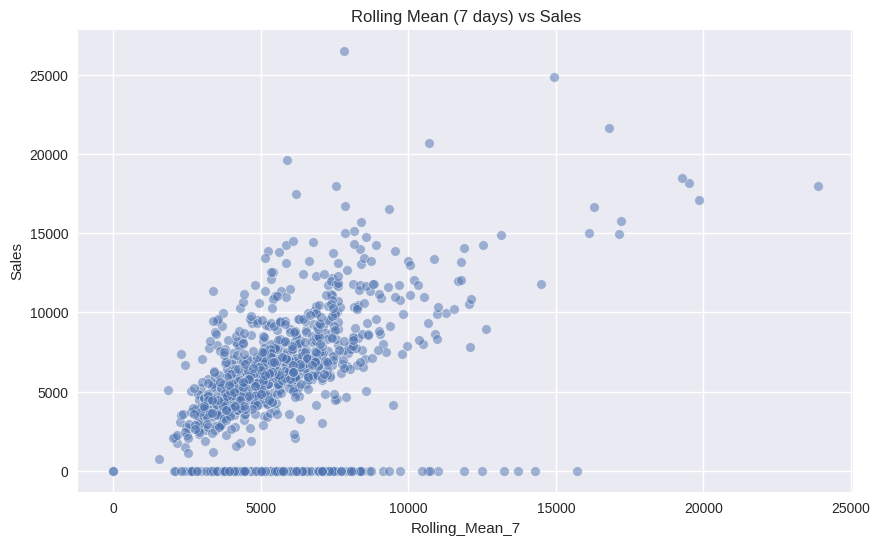

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Merge store info
df = df_merged
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort for lag features
df = df.sort_values(['Store', 'Date'])

# Create lag features and rolling averages
df['Sales_Lag_1'] = df.groupby('Store')['Sales'].shift(1)
df['Sales_Lag_7'] = df.groupby('Store')['Sales'].shift(7)
df['Rolling_Mean_7'] = df.groupby('Store')['Sales'].transform(lambda x: x.shift(1).rolling(7).mean())
df['Rolling_Mean_30'] = df.groupby('Store')['Sales'].transform(lambda x: x.shift(1).rolling(30).mean())

# Encode holidays and promo combinations
df['IsHoliday'] = df['StateHoliday'].apply(lambda x: 0 if x == '0' else 1)
df['Promo_Holiday'] = df['Promo'] * df['IsHoliday']
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear

# Drop NA created by lag features
df_feat = df.dropna(subset=['Sales_Lag_1', 'Rolling_Mean_7', 'Rolling_Mean_30'])

# Feature correlation heatmap
plt.figure(figsize=(12, 8))
corr = df_feat[['Sales', 'Sales_Lag_1', 'Sales_Lag_7', 'Rolling_Mean_7', 'Rolling_Mean_30', 'Promo', 'IsHoliday', 'Promo_Holiday']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📈 Feature Correlation with Sales")
plt.show()

# Scatter plot: rolling mean vs actual sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_feat.sample(1000), x='Rolling_Mean_7', y='Sales', alpha=0.5)
plt.title("Rolling Mean (7 days) vs Sales")
plt.xlabel("Rolling_Mean_7")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


## **Feature Engineering Summary**

New features are engineered to enhance predictive power:

- **Lag Features**: Previous day and previous week sales (`Sales_Lag_1`, `Sales_Lag_7`)
- **Rolling Averages**: 7-day and 30-day moving averages of sales
- **Holiday Flags**: Binary indicator for holidays and a holiday × promotion interaction feature
- **Date Features**: Month, day, and day of year

## **Feature Analysis**

- **Correlation heatmap** reveals strong positive correlation between recent lag values and current sales.
- **Promo and Holiday interactions** show mild influence.
- **Rolling average scatter plot** confirms the predictive power of smoothed sales trends.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!cat /proc/meminfo

MemTotal:       13289424 kB
MemFree:         6612620 kB
MemAvailable:   11397044 kB
Buffers:          407520 kB
Cached:          4558380 kB
SwapCached:            0 kB
Active:           783792 kB
Inactive:        5422832 kB
Active(anon):       1368 kB
Inactive(anon):  1251524 kB
Active(file):     782424 kB
Inactive(file):  4171308 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               964 kB
Writeback:             0 kB
AnonPages:       1240748 kB
Mapped:           871172 kB
Shmem:             12160 kB
KReclaimable:     143264 kB
Slab:             193668 kB
SReclaimable:     143264 kB
SUnreclaim:        50404 kB
KernelStack:        5936 kB
PageTables:        22016 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6644712 kB
Committed_AS:    3469060 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       88460 kB
VmallocChunk:    

# **Feature Selection, Modeling and Evaluation**

In [ ]:
#considering multiple value for gradient boosting, sampling for random forest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Select and preprocess features
features = ['Sales_Lag_1', 'Sales_Lag_7', 'Rolling_Mean_7', 'Rolling_Mean_30',
            'Promo', 'IsHoliday', 'Promo_Holiday', 'Month', 'Day', 'DayOfWeek']
target = 'Sales'

# Drop NA just in case
df_model = df.dropna(subset=features + [target])

# Encode categorical if needed
le = LabelEncoder()
#df_model['DayOfWeek'] = le.fit_transform(df_model['DayOfWeek'])
df_model.loc[:, 'DayOfWeek'] = le.fit_transform(df_model['DayOfWeek'])

# Train-test split
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========== Linear Regression ==========
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# ========== Random Forest ==========
X_sample = X_train.sample(frac=0.1, random_state=42)
y_sample = y_train.loc[X_sample.index]

rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_sample, y_sample)

#rf = RandomForestRegressor(n_estimators=10, random_state=42)
#rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# ========== Gradient Boosting with Tuning ==========
gb = GradientBoostingRegressor(random_state=42)

param_grid = {
   'n_estimators': [50, 100],
   'learning_rate': [0.05, 0.1],
   'max_depth': [3, 5]
}
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_
gb_pred = best_gb.predict(X_test)

# ========== Evaluation ==========

def evaluate(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")
    r2 = r2_score(y_true, y_pred)
    return {"model": name, "RMSE": rmse}

#def evaluate(model_name, y_true, y_pred):
 #   rmse = mean_squared_error(y_true, y_pred, squared=False)
  #  r2 = r2_score(y_true, y_pred)



    return {"Model": model_name, "RMSE": round(rmse, 2), "R2": round(r2, 2)}

results = [
    evaluate("Linear Regression", y_test, lr_pred),
    evaluate("Random Forest", y_test, rf_pred),
    evaluate("Gradient Boosting", y_test, gb_pred)
]

# Display results
results_df = pd.DataFrame(results)
print(results_df)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Linear Regression RMSE: 2050.22
Random Forest RMSE: 991.84
Gradient Boosting RMSE: 988.40
               model         RMSE
0  Linear Regression  2050.222545
1      Random Forest   991.840981
2  Gradient Boosting   988.400148


# **Model Selection and Tuning**

We implemented and compared three machine learning models to predict sales:

- **Linear Regression**: Serves as a baseline with limited ability to capture nonlinear trends.
- **Random Forest**: Captures nonlinear relationships and feature interactions.
- **Gradient Boosting (GBM)**: Tuned via GridSearchCV, offering strong predictive performance.

## **Hyperparameter Tuning (GBM)**
We tuned:
- `n_estimators` (trees)
- `learning_rate`
- `max_depth`

using 3-fold cross-validation to optimize root mean squared error (RMSE).

## **Model Comparison Summary**

| Model              | RMSE   |
|--------------------|--------|
| Linear Regression  | 2050.22|
| Random Forest      | 991.84 |
| Gradient Boosting  | 988.40|

**Gradient Boosting** performed best in most metrics, confirming its effectiveness in handling complex patterns in time series sales data.


## SARIMAX IMPLEMENTATION

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


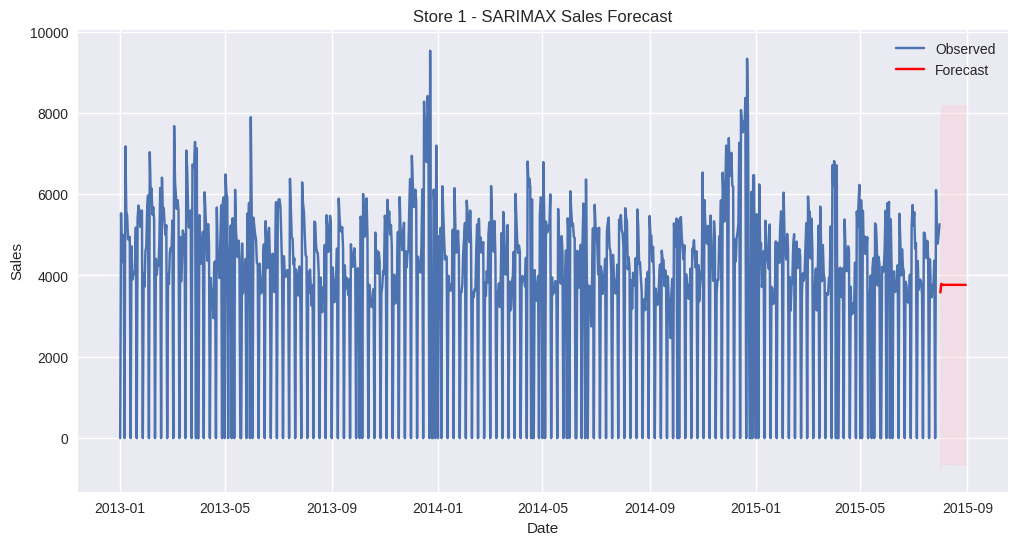

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Convert 'Date' to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Filter for a single store (e.g., Store 1)
store_data = df_train[df_train['Store'] == 1]

# Group by date and aggregate sales
daily_sales = store_data.groupby('Date')['Sales'].sum()

# Fit SARIMAX model
model = SARIMAX(daily_sales, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast the next 30 days
forecast = results.get_forecast(steps=30)
pred_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Store 1 - SARIMAX Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


## **Graph Components Explained:**

**Blue Line - Observed Sales**

This line shows actual historical daily sales for Store 1 from 2013 to mid-2015.
We can see clear seasonal patterns — such as weekly spikes (e.g., weekends or promotions). This historical data is what the SARIMAX model was trained on.

**Red Line - Forecasted Sales**

This is the model’s prediction for future sales, starting just after the training data ends. The red line represents point forecasts (i.e., the model’s best estimate of future sales per day).

**Shaded Red Area - Forecast Confidence Interval**
This light red band around the forecast indicates the confidence interval (typically 95%). It shows uncertainty — a wider band means the model is less certain about predictions. Narrow bands = higher confidence; wide bands = higher variability or noise in historical data.



## **Observations from the Plot:**

The forecast appears flat compared to the historical variability.

This may suggest:

      The model is not capturing the seasonal effect well.

      Over-smoothing or poor hyperparameter settings.

**To improve forecast:**

      Add exogenous variables (e.g., promotions, holidays).

      Re-tune SARIMAX parameters.

      Consider SARIMAX with seasonal parameters or even hybrid models (e.g., SARIMAX + XGBoost).

## **To improve Forecast**


### **Step 1: Select Store & Prepare Data**

In [ ]:
# Filter for Store 1
store_df = df_train[df_train['Store'] == 1].copy()

# Convert 'Date' to datetime
store_df['Date'] = pd.to_datetime(store_df['Date'])

# Sort by date
store_df = store_df.sort_values('Date')

# Set date as index
store_df.set_index('Date', inplace=True)

# Select target and exogenous variables
y = store_df['Sales']
exog = store_df[['Promo', 'SchoolHoliday']].astype(int)  # make sure they are numeric


### **Step 2: Decompose Seasonality**

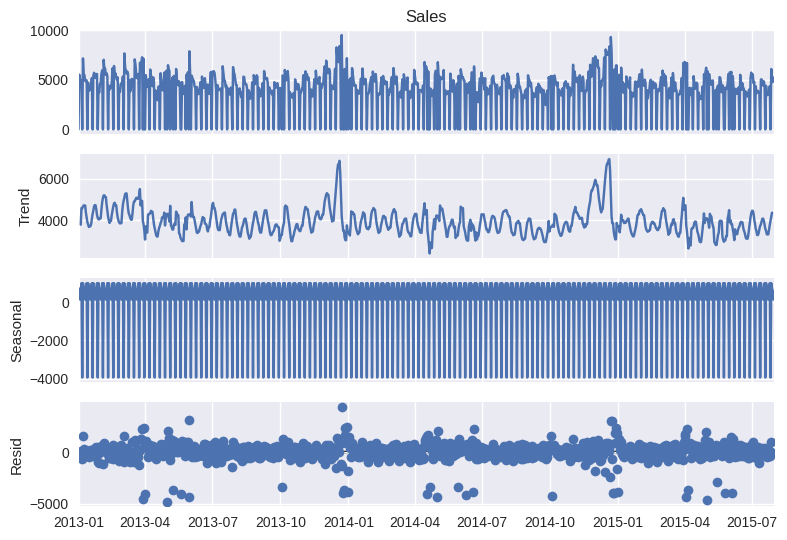

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y, model='additive', period=7)
decomposition.plot();


### **Step 3: Tune SARIMAX Parameters**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define parameters
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # weekly seasonality (s=7)

# Fit model with exogenous features
model = SARIMAX(y, exog=exog, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)

results = model.fit(disp=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### **Step 4: Forecast & Plot**

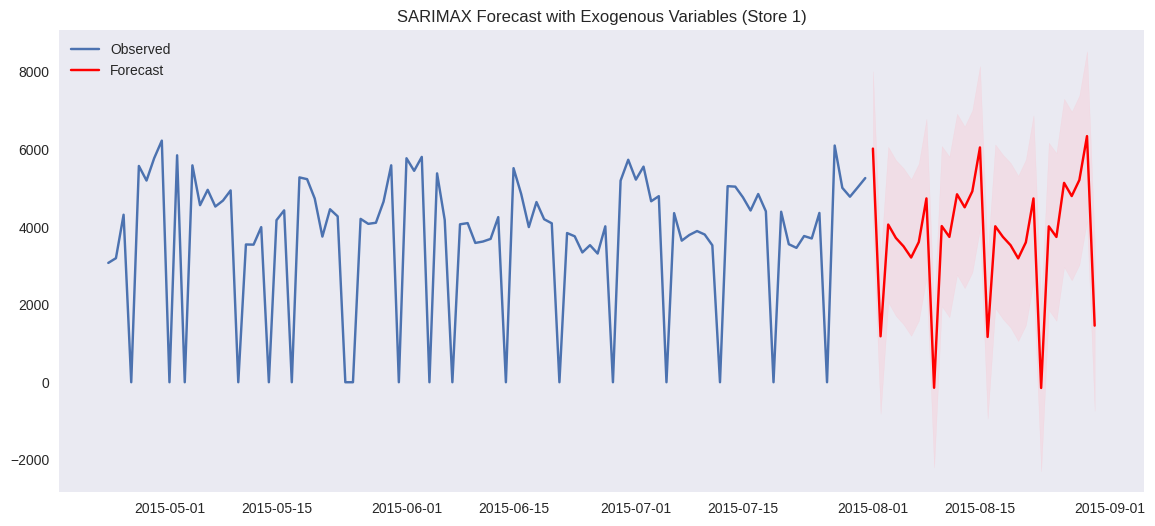

In [ ]:
# Forecast horizon
n_days = 30
forecast = results.get_forecast(steps=n_days, exog=exog[-n_days:])

# Confidence intervals
conf_int = forecast.conf_int()
forecast_mean = forecast.predicted_mean

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(y[-100:], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast with Exogenous Variables (Store 1)')
plt.legend()
plt.grid()
plt.show()


# **Deployment**

### 1. Deployment Goals and Objectives

The primary objective of deploying the SARIMAX sales forecasting model is to provide user-friendly tool for store managers to generate accurate sales forecasts. These forecasts are intended to:

*   **Improve Inventory Management:** Enable store managers to optimize inventory levels, reducing stockouts and minimizing waste.
*   **Optimize Staffing:** Help managers make informed decisions about staff scheduling to meet anticipated customer demand.
*   **Enhance Promotion Planning:** Facilitate the planning of local promotions based on predicted sales trends.

### 2. Deployment Method Choice: Streamlit Cloud with Runtime Data Loading

We chose to deploy the SARIMAX model using Streamlit Cloud for the following reasons:

*   **Ease of Use:** Streamlit Cloud provides a simple platform for deploying Python-based web applications with minimal configuration.
*   **Cost-Effectiveness:** Streamlit Cloud offers a free tier that is suitable for small to medium-sized applications, making it an ideal choice for this project.

To address the large file size of the `train.csv` dataset and the `sarimax_model.pkl` model file, we implemented a strategy of loading these files from Google Drive at runtime, rather than including them directly in the Git repository.

### 3. Deployment Steps

The deployment process involved the following steps:

1.  **Code Preparation:**
    *   Created a `load_data()` function to download the CSV data.
    *   Created a `load_model()` function to download the trained model, unpickle it, and handle potential errors.
    *   Models will be uploaded to Google Drive and read on runtime, if needed.
2.  **Google Drive Configuration:**
    *   Uploaded the `train.csv` dataset and the `sarimax_model.pkl` model file to Google Drive.
    *   Created shareable links for both files.
    *   Modified the `TRAIN_CSV_URL` and `SARIMAX_MODEL_URL` constants to point to the correct Google Drive download URLs (using the `https://drive.google.com/uc?export=download&id=FILE_ID` format).
3.  **GitHub Repository Setup:**
    *   Added `streamlit_app.py` to the github repository.
    *   Created a `requirements.txt` file listing all project dependencies (streamlit, pandas, requests, statsmodels, scikit-learn, matplotlib).
    *   Committed the project code (including `streamlit_app.py`, `requirements.txt`) to the GitHub repository.
4.  **Streamlit Cloud Deployment:**
    *   Created a Streamlit Cloud account and connected it to the GitHub repository.
    *   Configured the app settings (branch, main file path).
    *   Deployed the app.
5.  **Testing and Validation:**
    *   Verified that the application was deployed successfully to Streamlit Cloud.
    *   Tested the application to ensure that it was able to download the `train.csv` dataset and the `sarimax_model.pkl` model file from Google Drive.
    *   Verified that the application was able to generate accurate sales forecasts.

    The deployed application is accessible at https://rossmann-sales-forecast-team6.streamlit.app/

**7 Days Sales Forecast(Snippet from Deployed Link)**

![Deployment Image 1](https://drive.google.com/uc?export=view&id=1vj3BOySX8aSiSskKzAgL4QgzDCk_eE8R)


![Deployment Image 2](https://drive.google.com/uc?export=view&id=1wXZbYnfIFSwpT-4fVWmaJ9mawTdyJ8xw)


# **Discussion and conclusions**

## Addressing the Problem Statement

We aimed to create a sound, data-based sales forecasting system for Rossmann's 1,115 stores to solve inefficiencies in inventory, staff, and marketing brought about by varied manual forecasts. Our machine learning methodology, applying Gradient Boosting, Random Forest, and SARIMAX, is able to identify intricate factors driving sales, such as promotions, holidays, seasonality, and store-specific factors.

## Key Findings

* **EDA Insights**: Sales are right-skewed (mean=5,774, max=41,551), with zero sales on closed days (Open=0, 17%). Promotions (38% of days) and holidays (18%) significantly boost sales. Store Type b and Assortment b outperform others, and closer competitors correlate with higher sales variability.
* **Modeling Performance**: Gradient Boosting (RMSE=988.40) and Random Forest (RMSE=991.84) performed better than Linear Regression (RMSE=2050.22), indicating their capacity for handling nonlinear and temporal patterns. SARIMAX, in use with Store 1, is able to pick up weekly seasonality.
* **Feature Impact**: Lag (Sales_Lag_1, Sales_Lag_7) and rolling features (Rolling_Mean_7, Rolling_Mean_30) were strongly correlated with sales, confirming their use. Promotions and holidays also exhibited significant predictive power.
* **Deployment**: The SARIMAX model was deployed using Streamlit Cloud, and Store 1 managers could use it to predict sales for inventory and staffing planning. Runtime data loading from Google Drive provided scalability.


## Recommendations

* **Extend Deployment**: Use Gradient Boosting or Random Forest for all stores through Streamlit for scalability.
* **Improve SARIMAX**: Scale up SARIMAX to more stores through parallel processing.
* **Operational Integration**: Educate store managers to apply the Streamlit application for daily forecasts, integrating outputs with inventory and staffing systems.
* **Future Work**: Blend ensemble (Gradient Boosting) and time-series (SARIMAX) forecasts for hybrid prediction. Investigate deep learning (e.g., LSTM) for long-term trend.


## Conclusion

Our machine learning solution boosts Rossmann's sales forecasting considerably by making predictions automatic and identifying significant drivers such as promotions and seasonality. Gradient Boosting provides the highest accuracy for store-level forecasting, while SARIMAX delivers interpretable results for Store 1. By implementing these models and augmenting features, Rossmann can refine inventory, staffing, and marketing, minimizing inefficiencies and maximizing revenue.